### QC+ for Cai 2020 dataset

#### Objective: Run advanced QC for the Cai 2020 dataset, including data normalization, log transformation, and UMAP visualization


**Developed by**: Mairi McClean
**Affiliation**: Computational Health Centre - Helmholtz Munich
**v221130**


### Load modules

In [32]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
import igraph as ig
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
entrypoints         0.4
executing           1.1.1
google              NA
h5py                3.6.0
hypergeom_ufunc     NA
ipykernel           6.16.2
ipywidgets          8.0.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.6.1
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.56.3
numexpr             2.8.1
numpy               1.23.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources

### Read in anndata object

In [3]:
adata = sc.read_h5ad('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/2111_2511_exported_objects/23/CaiY2020_PBMC_TB_QCed_pre-process_mm221123.h5ad')
adata

AnnData object with n_obs × n_vars = 73146 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'sample_colors', 'status_colors'
    layers: 'counts', 'sqrt_norm'

### Data normalization

In [6]:
# target_sum taken from Scanpy tutorial [https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html]

#If exclude_highly_expressed=True, very highly expressed genes are excluded from the computation of the normalization factor (size factor) for each cell. 
#This is meaningful as these can strongly influence the resulting normalized values for all other genes [Weinreb17]."

sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


### Data log transformation

In [5]:
sc.pp.log1p(adata)

### Identify highly variable genes

In [7]:
# taken from Scanpy tutorial; values predetermined; should try Carlos' code from scVI_exploratory_analysis

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
adata.var


,gene_id,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
DDX11L1,ENSG00000223972.5,False,False,6,0.000082,99.991797,6.0,False,1.530551e+01,26.505063,0.122819
WASH7P,ENSG00000227232.5,False,False,1,0.000014,99.998633,1.0,False,2.731106e-04,2.994715,-2.187728
MIR6859-1,ENSG00000278267.1,False,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
MIR1302-2HG,ENSG00000243485.5,False,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
MIR1302-2,ENSG00000284332.1,False,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,ENSG00000198695.2,True,False,10818,0.183059,85.210401,13390.0,False,4.090852e+01,49.067069,-0.920662
MT-TE,ENSG00000210194.1,True,False,626,0.008627,99.144177,631.0,False,3.835359e+01,49.004516,-0.157020
MT-CYB,ENSG00000198727.2,True,False,70927,9.182444,3.033659,671659.0,False,4.443121e+01,51.569948,1.485187
MT-TT,ENSG00000210195.2,True,False,228,0.003144,99.688295,230.0,False,1.400948e+01,25.208300,1.599646


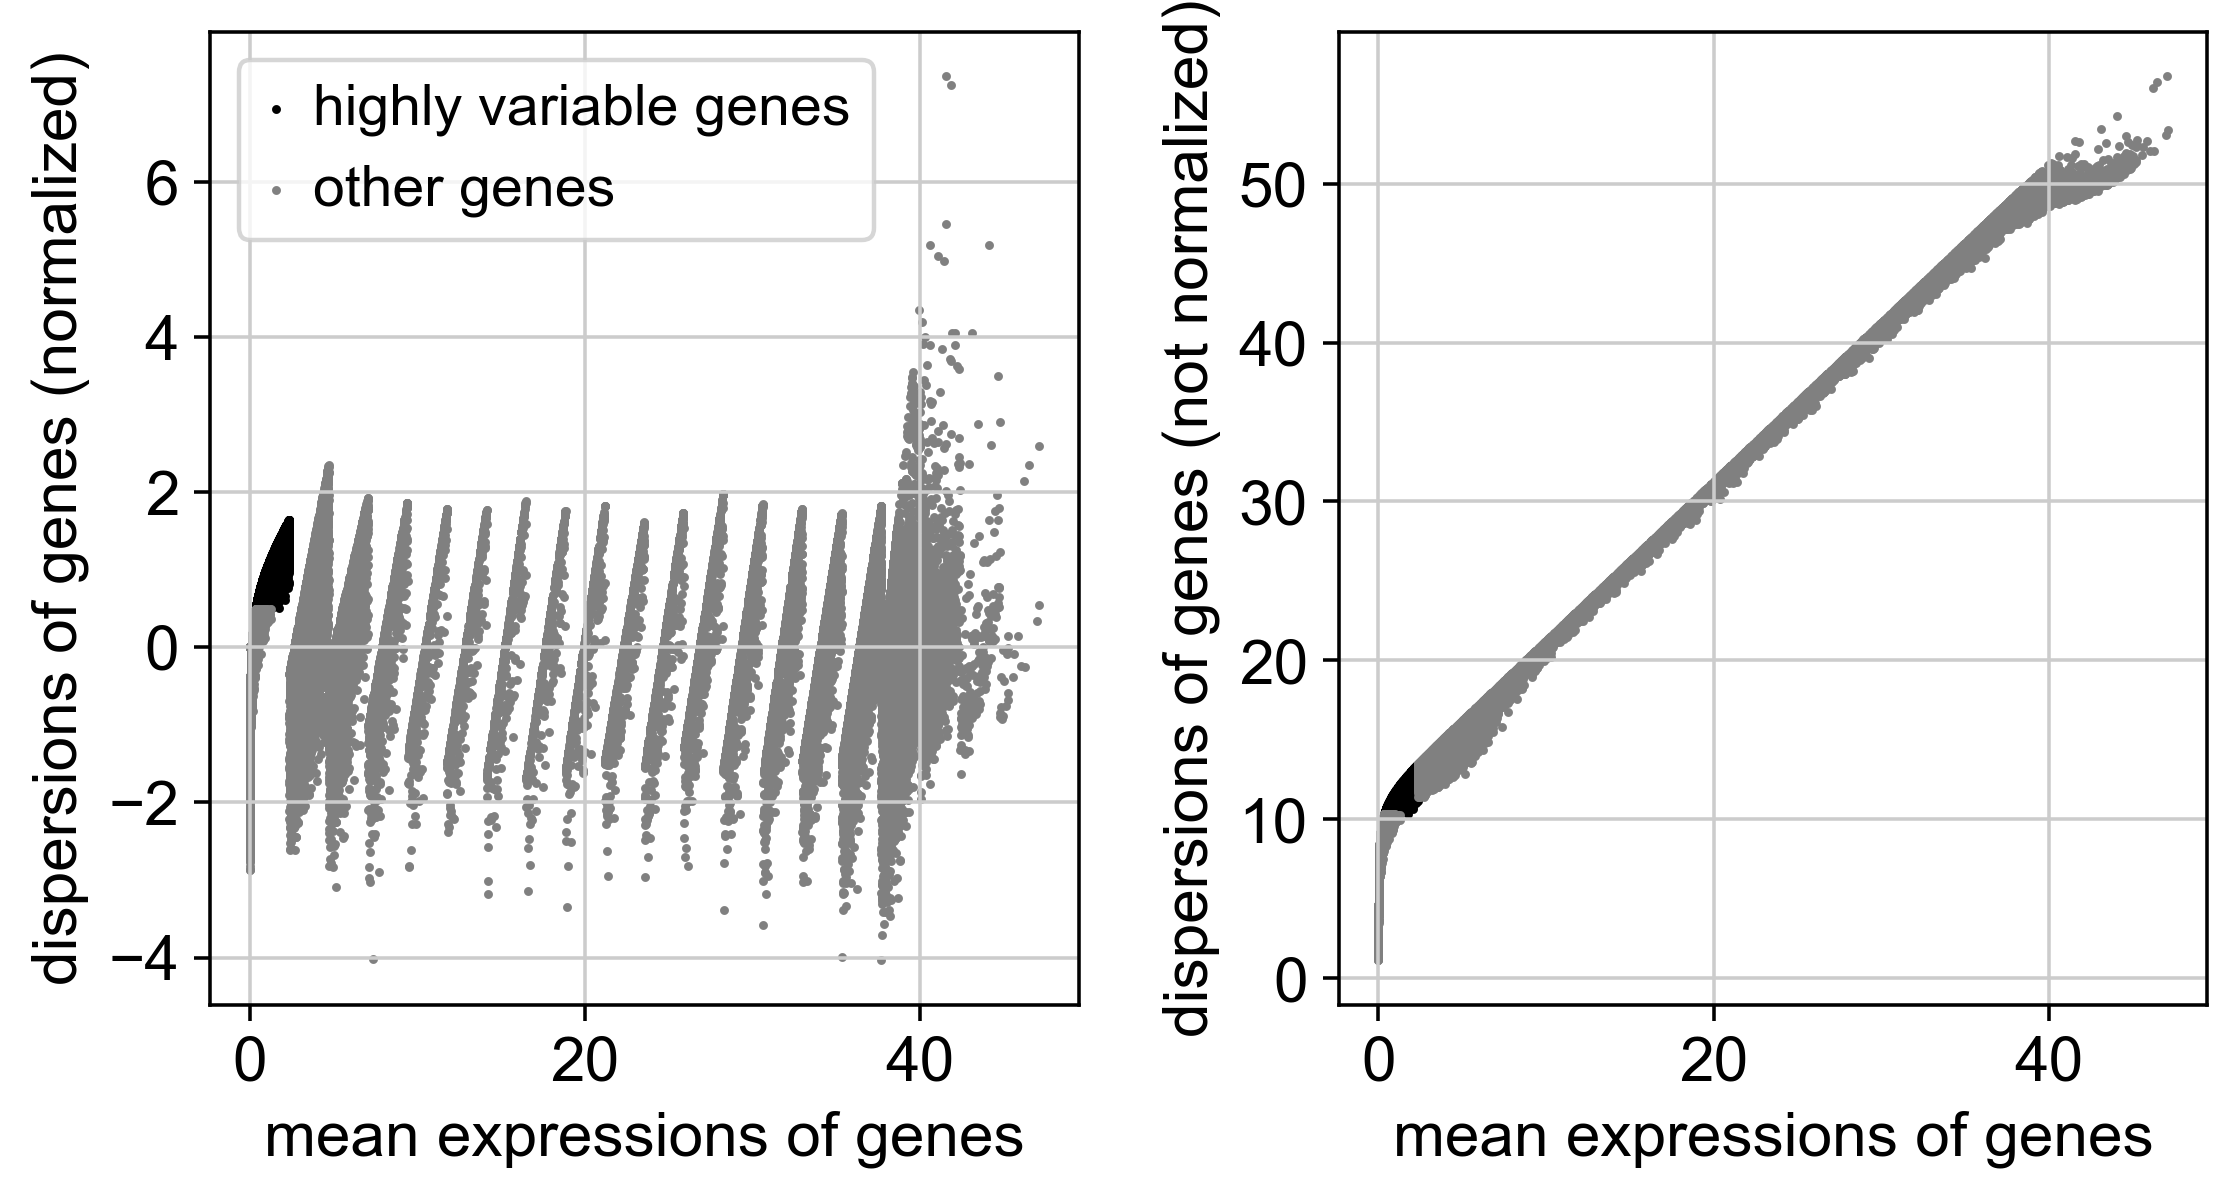

In [13]:
sc.pl.highly_variable_genes(adata)


### Set the raw attribute of the adata object
#### Freezes the state of the adata object


In [14]:
adata.raw = adata

### Filtering

In [16]:
# the actual filtering step
adata = adata[:, adata.var.highly_variable]

#"regress out effects of total counts per cell and the percentage of mito genes expressed, scale the data to unit variance"
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:02:29)


In [18]:
#"Scale each gene to unit variance. Clip values exceeding standard deviation 10"

sc.pp.scale(adata, max_value=10)

### PCA

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:14)


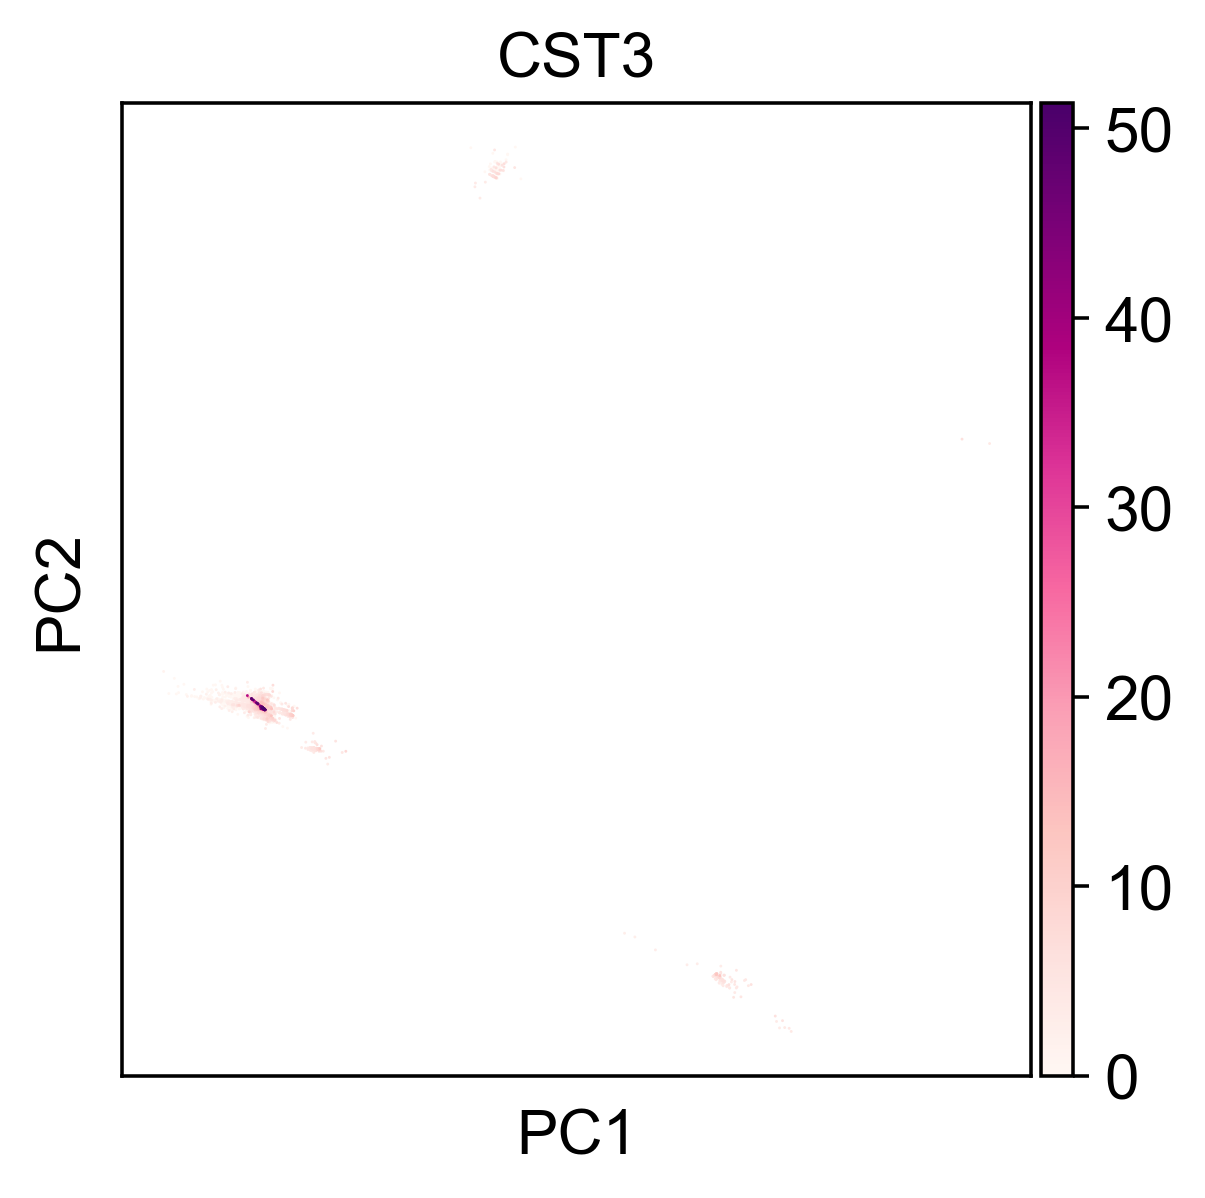

In [23]:
sc.pl.pca(adata, color='CST3')

In [ ]:
# Why is the scale of the legend so high?


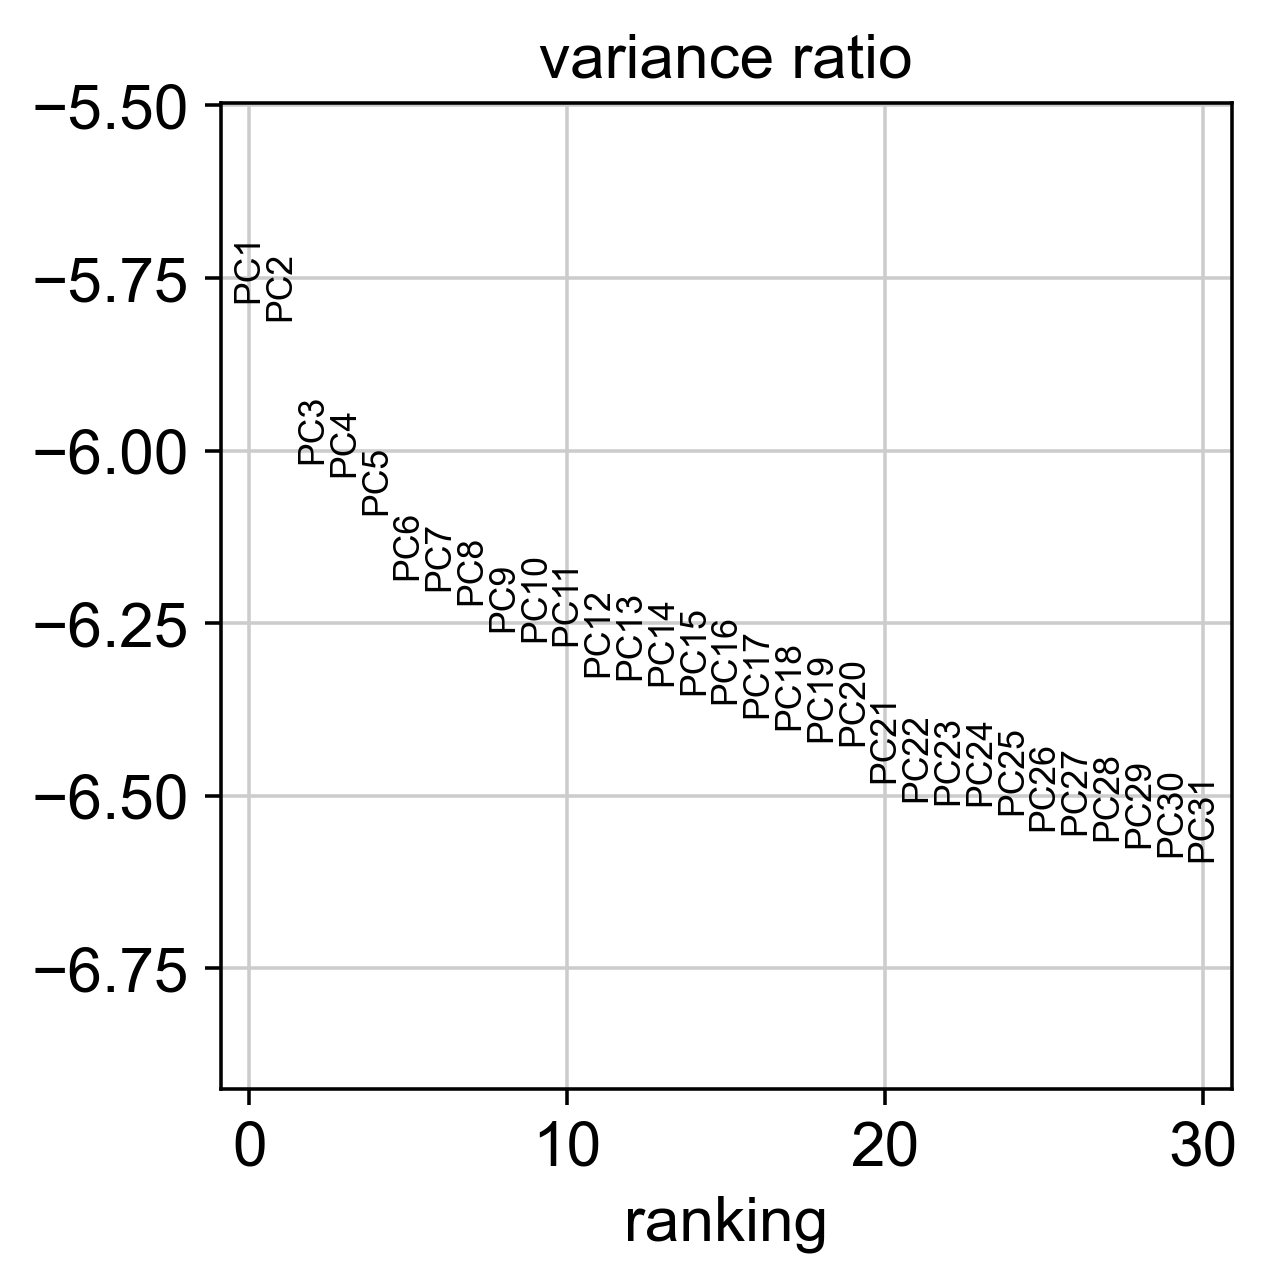

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
adata.write('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/qc_plus_visualisation/221130_CaiY2020_MM_PCA_vis')

In [26]:
adata

AnnData object with n_obs × n_vars = 73146 × 4308
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'donor_colors', 'sample_colors', 'status_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'sqrt_norm'

### Computing neighbourhood graph

In [27]:
#Values taken from tutorial

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


### UMAP embedding

In [34]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 176 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)


In [35]:
#Code from Scanpy tutorial

sc.tl.paga(adata)

sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:08)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


In [36]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:30)


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


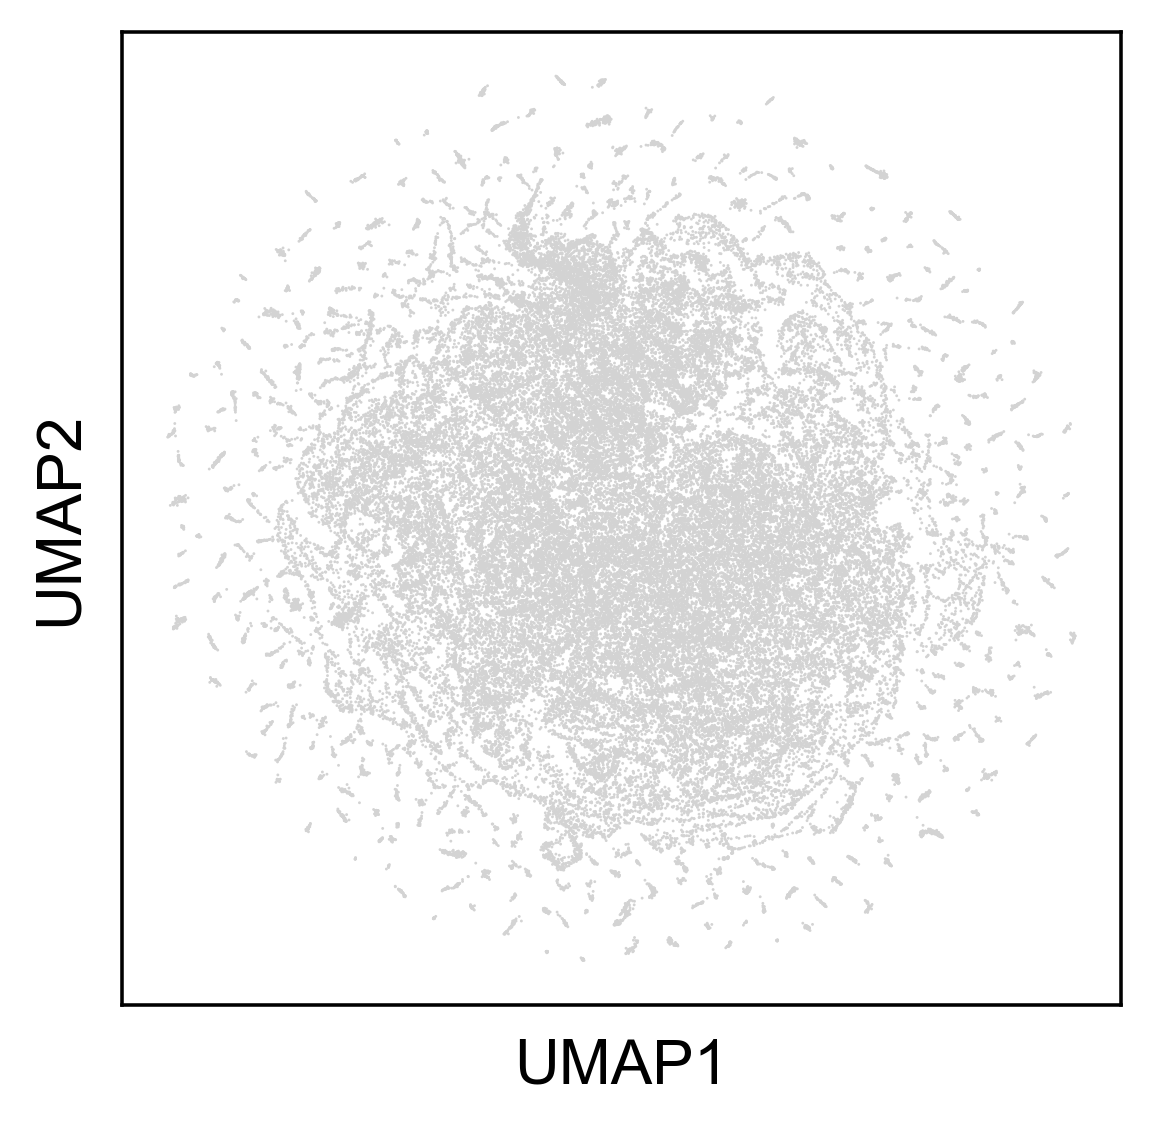

In [39]:
#Visualization of adata object, 'color' here can denote specific obs/var/genes
sc.pl.umap(adata)

In [41]:
adata.var


,gene_id,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
ENSG00000286448,ENSG00000286448.1,False,False,2,0.000027,99.997266,2.0,True,1.271277,12.142203,1.164669,1.456736e-12,0.045868
ENSG00000272438,ENSG00000272438.1,False,False,2,0.000027,99.997266,2.0,True,0.647358,11.090996,0.779420,8.344549e-12,0.047086
PERM1,ENSG00000187642.9,False,False,6,0.000082,99.991797,6.0,True,0.783433,10.685935,0.630972,5.267248e-13,0.068157
ANKRD65,ENSG00000235098.9,False,False,49,0.000684,99.933011,50.0,True,1.980578,12.110968,1.153222,9.456033e-13,0.162136
TMEM240,ENSG00000205090.9,False,False,22,0.000328,99.969923,24.0,True,1.811180,12.294222,1.220381,-7.265861e-12,0.125619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEFLP1,ENSG00000232634.1,False,False,7,0.000096,99.990430,7.0,True,1.072643,11.145514,0.799400,-5.854296e-12,0.075646
ENSG00000288057,ENSG00000288057.1,False,False,1,0.000014,99.998633,1.0,True,1.238455,12.096415,1.147888,-1.491922e-12,0.044726
TTTY13,ENSG00000184991.3,False,False,1,0.000014,99.998633,1.0,True,0.379142,10.425922,0.535682,-5.994658e-12,0.038550
USP9YP3,ENSG00000237023.1,False,False,28,0.000383,99.961720,28.0,True,1.737918,11.459856,0.914600,-1.045480e-11,0.139273


In [ ]:
# Why have some gene names been swapped with GeneIDs?

In [42]:
adata.obs

,study,individual,sample,tissue,donor,age,gender,status,data_type,centre,...,total_counts_ribo,pct_counts_ribo,percent_mt2,n_counts,percent_chrY,XIST-counts,S_score,G2M_score,predicted_doublets,louvain
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAACAATC-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,...,1676.0,29.747959,0.060170,5634.0,0.053248,0.0,-0.352188,-0.193287,0.0,3
AAACCTGAGAAGGTGA-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,...,1901.0,53.761311,0.016686,3536.0,0.113122,0.0,-0.064944,-0.071169,0.0,29
AAACCTGAGATCTGCT-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,...,367.0,19.880823,0.099675,1846.0,0.054171,0.0,-0.231399,-0.080643,0.0,20
AAACCTGAGCACAGGT-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,...,772.0,19.333836,0.045580,3993.0,0.075131,0.0,-0.227884,-0.258770,0.0,28
AAACCTGAGCGTGAAC-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,...,1003.0,49.287468,0.024570,2035.0,0.147420,0.0,0.020959,0.025030,0.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCGCGGTT-H1,CaiY_2021,SAMN14048019,PBMC_HC_1,PBMC,SAMN14048019,26,male,Healthy,scRNAseq,Shenzhen University,...,1904.0,52.451790,0.032507,3630.0,0.110193,0.0,-0.165353,-0.250572,0.0,41
TTTGTCAGTCGCTTCT-H1,CaiY_2021,SAMN14048019,PBMC_HC_1,PBMC,SAMN14048019,26,male,Healthy,scRNAseq,Shenzhen University,...,868.0,37.592033,0.042876,2309.0,0.043309,0.0,-0.177318,-0.173327,0.0,34
TTTGTCAGTTCGAATC-H1,CaiY_2021,SAMN14048019,PBMC_HC_1,PBMC,SAMN14048019,26,male,Healthy,scRNAseq,Shenzhen University,...,712.0,28.872669,0.066504,2466.0,0.040551,0.0,-0.235875,-0.013744,0.0,23


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


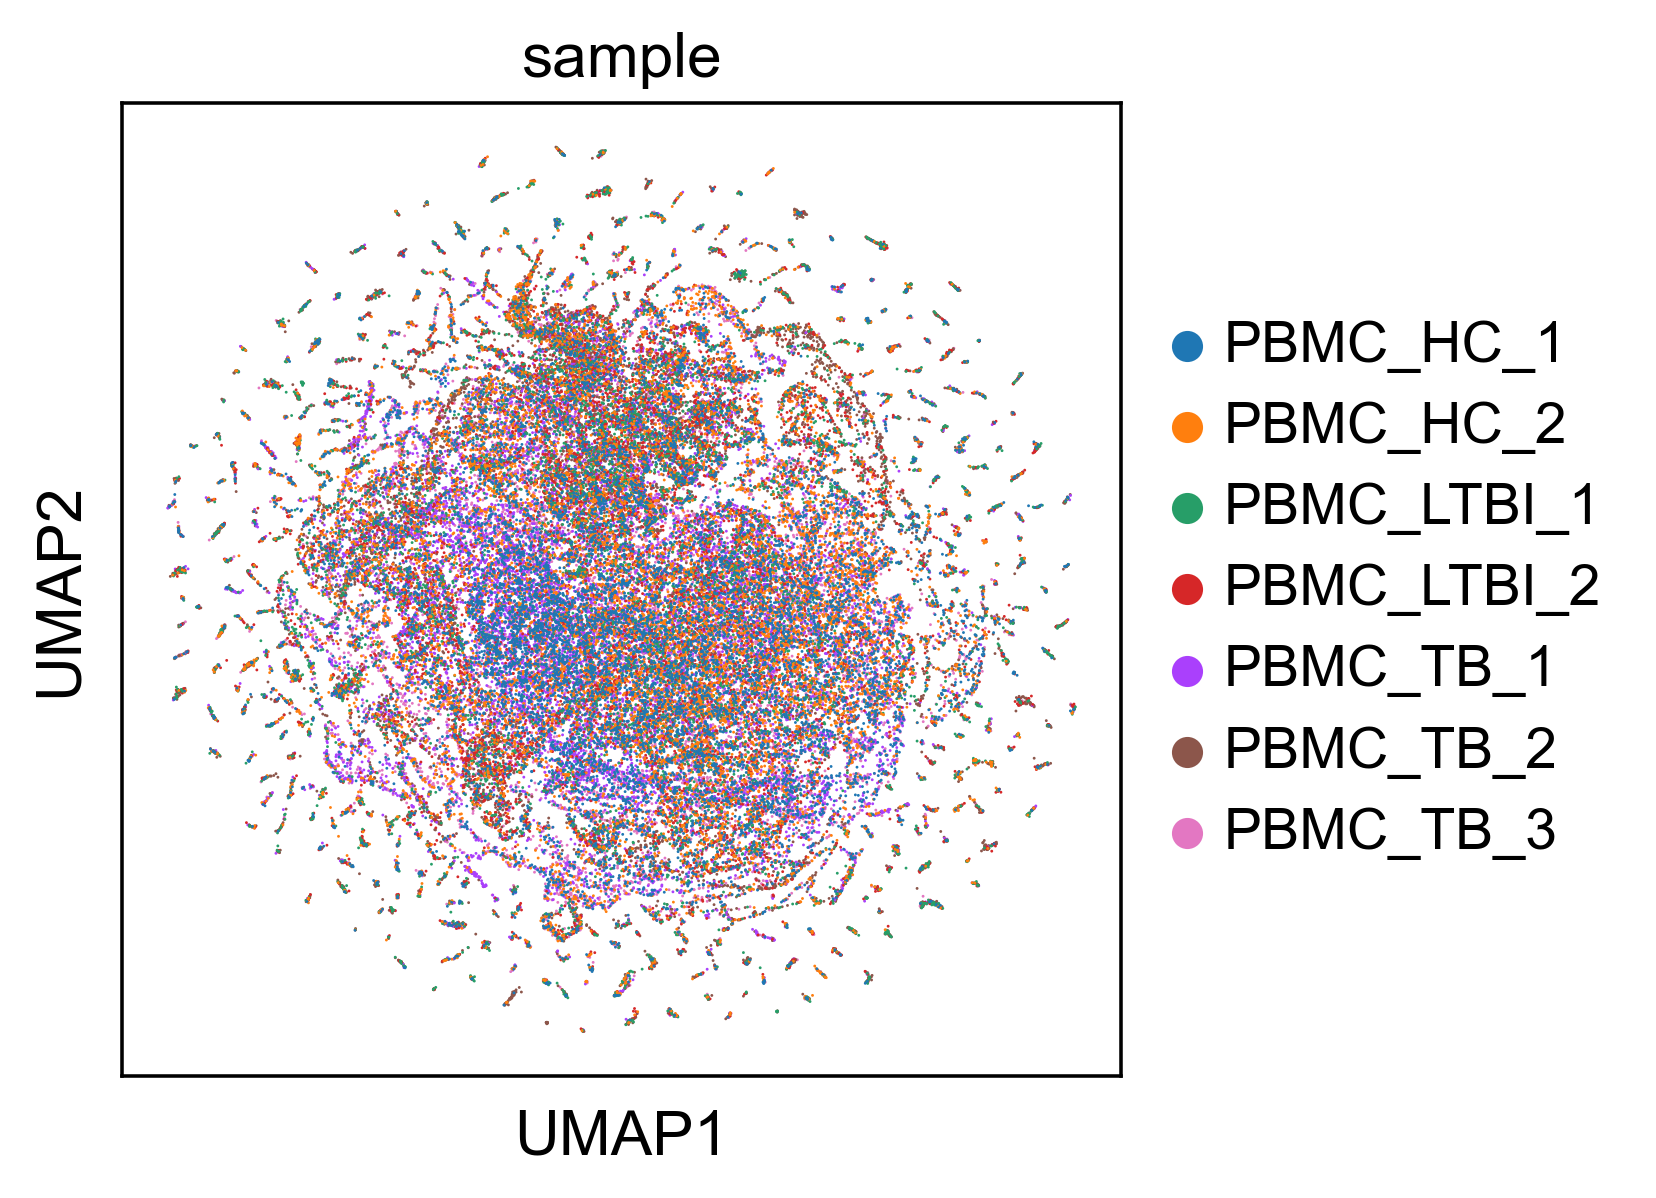

In [44]:
sc.pl.umap(adata, color='sample')

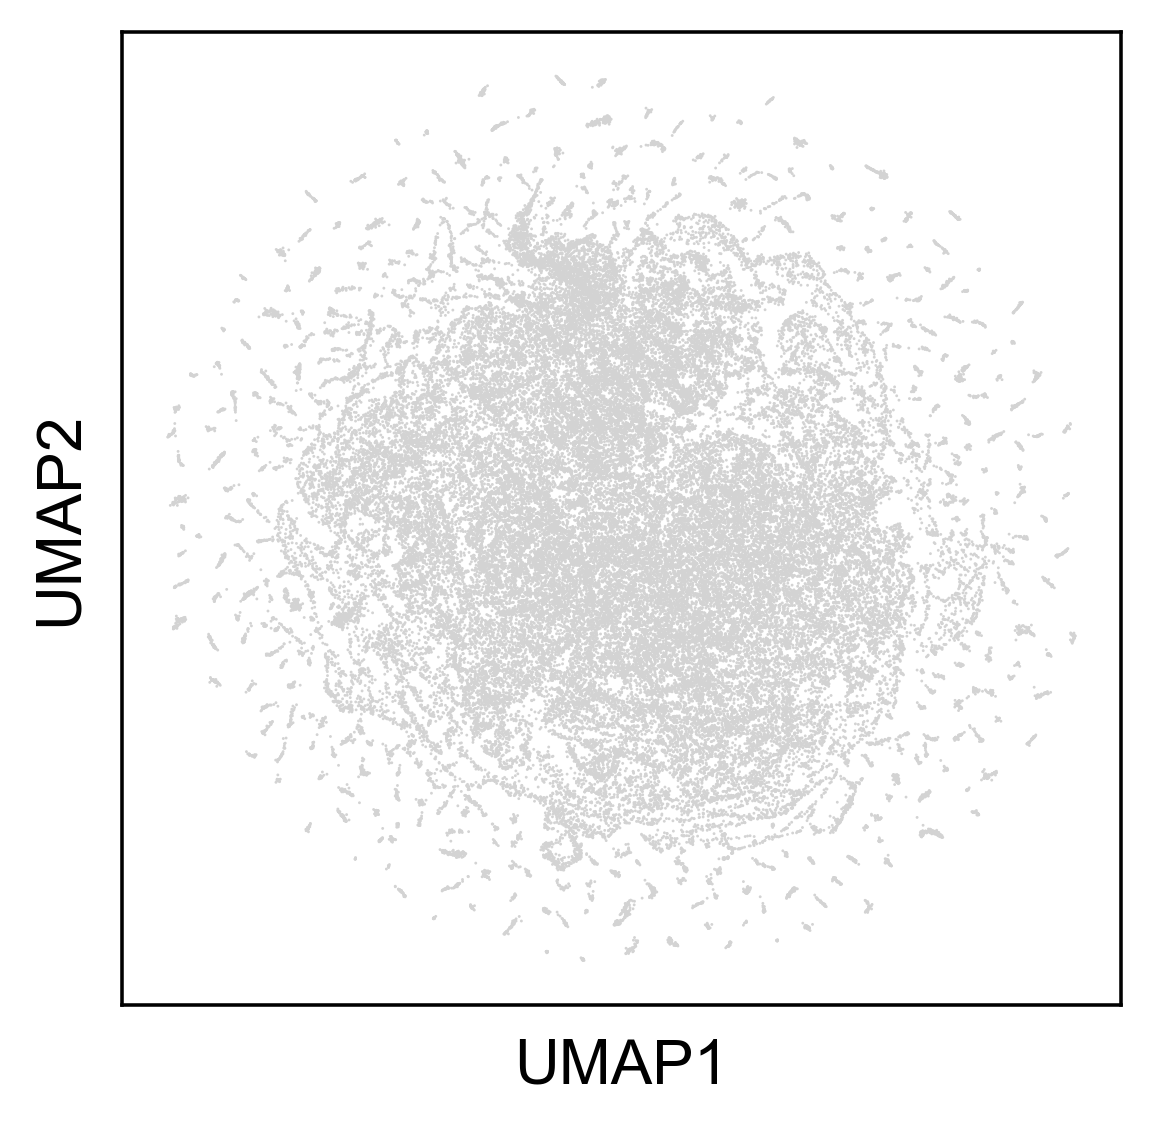

In [40]:
# Now we can use the following code to plot the scaled and corrected gene expression data

sc.pl.umap(adata, use_raw=False)